# 1. Exploring the Data

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
print (digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [14]:
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]
print(f"data.shape = {data.shape}")
print(f"images.shape = {images.shape}")

data.shape = (1797, 64)
images.shape = (1797, 8, 8)


In [5]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
print(images.shape)

(1797, 8, 8)


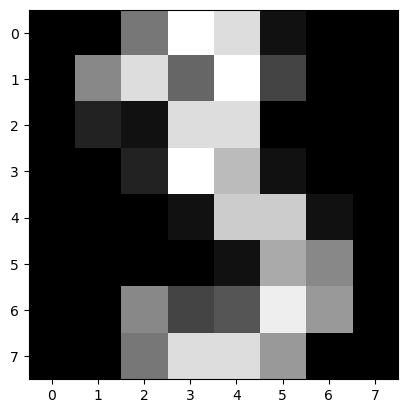

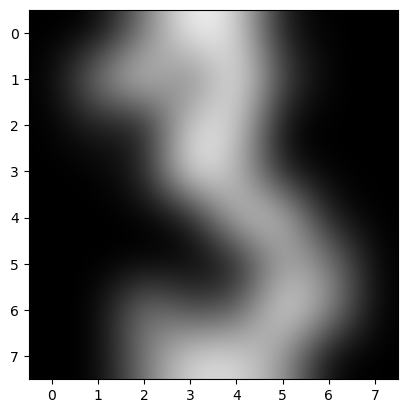

In [8]:
img = images[3]
assert 2 == len(img.shape)
plt.figure()
plt.gray()
plt.imshow (img , interpolation ="nearest") # also try interpolation =" bicubic "
plt.show()

plt.imshow(img, interpolation="bicubic")
plt.show()

In [9]:
from sklearn import model_selection
X_all = data[(target == 3) | (target == 9)]
y_all = target[(target == 3) | (target == 9)]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, test_size=0.4, random_state=0)


# 2.1 Feature Construction

In [10]:
def features2d(x):
    f1 = 0.3*x[:, 22] + 4.2*x[:, 12] - x[:, 63]
    f2 = x[:, 32] - x[:, 61]
    features = np.stack((f1, f2), axis=1)
    return features

X_train_2d = features2d(X_train)
X_test_2d = features2d(X_test)

# 2.2 Scatterplot

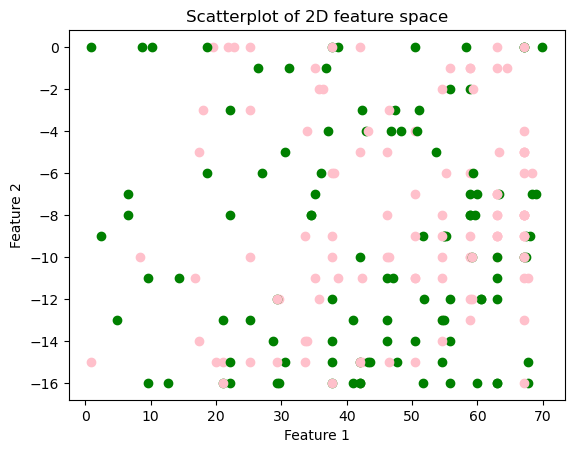

In [11]:
features = features2d(X_train)

def feature(features, label):
    label_map = {3: ("o", "pink"), -1: ("o", "pink"), 9: ("o", "green"), 1: ("o", "green")}
    for feature, y in zip(features, label):
        marker, color = label_map[y]
        plt.scatter(feature[0], feature[1], marker=marker, color=color)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Scatterplot of 2D feature space")
    plt.show()
    
feature(features, y_train)

# 2.3 Decision Rule

In [12]:
def nearest_mean(training_features, training_labels, test_features):
    t_features = np.array(training_features)
    t_labels = np.array(training_labels)

    f_neg = np.mean(t_features[t_labels == -1], axis=0)
    f_pos = np.mean(t_features[t_labels == 1], axis=0)

    dist_neg = np.sum(np.square(test_features - f_neg), axis=1)
    dist_pos = np.sum(np.square(test_features - f_pos), axis=1)

    labels = np.where(dist_neg > dist_pos, 1, -1)

    return labels


def print_errors_nearest(X_train, y_train, X_test, y_test):
    train_labels = nearest_mean(X_train, y_train, X_train)
    test_labels = nearest_mean(X_train, y_train, X_test)

    training_error = abs(train_labels - y_train).sum()/(2*len(y_train))
    test_error = abs(test_labels - y_test).sum()/(2*len(y_test))
    print(f"training error: {training_error}")
    print(f"test error: {test_error}")


print_errors_nearest(X_train_2d, y_train, X_test_2d, y_test)

training error: 3.4654377880184333
test error: 3.5205479452054793


C:\Users\shrut\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shrut\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [13]:
from sklearn.model_selection import KFold

def cross_validation_nearest(X,y,n_splits=10):
    # create a 5-fold cross-validation iterator
    kf = KFold(n_splits=10, shuffle=True, random_state=42)


    test_errors=[]
    # loop over the folds and train/test the model on each fold
    for train_index, test_index in kf.split(X):
        # get the training and test data for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        

        # evaluate the model on the test data for this fold
        test_labels = nearest_mean(X_train, y_train, X_test)
        test_error = abs(test_labels - y_test).sum()/(2*len(y_test))
        test_errors.append(test_error)

    total_error = np.array(test_errors).mean()
    print(f"Cross Validation Error: {total_error}")
    # return total_error


cross_validation_nearest(X_all,y_all,n_splits=10)

Cross Validation Error: 3.4876126126126126
